# Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# Downlaod Files:

- https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [69]:
#Import neccessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Description of features.

* Passenger ID - Unique ID of passengers.
* Survived - Passenger survived '1' and not survived '0'.
* Pclass - Class of ticket.
* Name - Passenger's name.
* Sex - Sex of passengers.
* Age - Age of passengers.
* SibSp - Siblings/ Spouse on board.
* Parch - Parent's/ children on board.
* Ticket - Ticket number.
* Fare - Ticket fare.
* Cabin - Cabin number.
* Embarked - Port of embarkation.

# Problem Solution:

Here I need to predict wether passenger survived or not. Survived is my target variable and rest all the features are independent variables. This is a binary classification problem, to predict passenger's survival I am going to build few classification models and will compare them according to their metrics and use one of the model to predict answer.

In [3]:
#Statistics of dataset.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Observations:

* Around 38% passengers of the dataset survived.
* Passengers from 4 months to 80 years of Age were present on the titanic.
* Seeing missing values in Age column.

In [4]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# We have 5 object data type columns which are Name, Sex, Ticket number, Cabin and Embarked. Rest 7 columns are float and integer data type.

In [5]:
#Get count of number of survivors.
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Survived counts are lesser than non-survived counts. Only 342 passengers  survived out of 891.

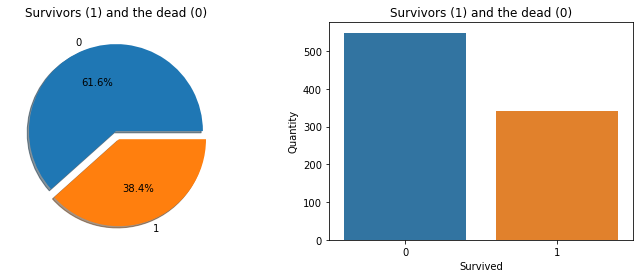

In [6]:
#Visualizing the count of survivors
fig, ax = plt.subplots(1,2, figsize = (12,4))
df['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df, ax = ax[1])
ax[1].set_title('Survivors (1) and the dead (0)')
ax[1].set_ylabel('Quantity')
plt.show()

# 61.6% passengers of the data set died on the day when the titanic sanked and 38.4% passengers survived.

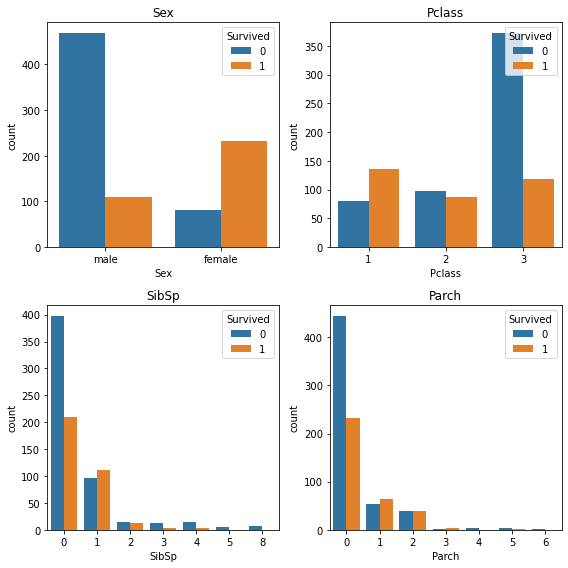

In [7]:
#Visualize the count of survivors for columns 'Sex', 'Pclass', 'Sibsp', 'Parch' and 'Embarked'.
columns = ['Sex', 'Pclass', 'SibSp', 'Parch']

rows = 2
cols = 2

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(rows, cols, figsize = (cols * 4, rows * 4))

for r in range(0, rows):
    for c in range(0, cols):
        
        i = r * cols + c #index to go through the number of columns
        ax = axs[r][c]#Show where to position each subplot
        sns.countplot(df[columns[i]], hue = df['Survived'], ax = ax)
        ax.set_title(columns[i])
        ax.legend(title = 'Survived', loc = 'upper right')
        
plt.tight_layout()

# Observations from the above graph

* Male survival count is very poor compared to Female. Majority of the Male passengers did not survive.
* Over 400 male passengers died out of 891 and only 100 male passengers survived.
* Around 350 3rd class passengers did not survive.
* For Sibling/Spouse if the number is 0 then most likly the majority of those passengers did not survive. 
* Same with Parent/Child the passenger without parent or child most likely did not survive the sink.

In [8]:
#Look at the survival rate by sex.
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


# I can see that 74.2% female of this dataset survived where as only 18.89% male passenger of this dataset survived.

In [9]:
#Look at survival rate by sex and class.
df.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Females of first class have the highest rate of survival which is 96.8% and males of third class have lowest survival rate which is 13.5%.

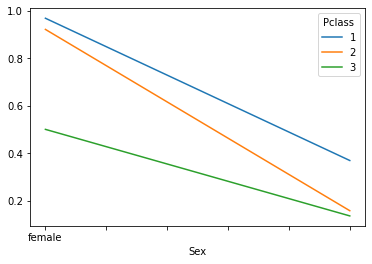

In [11]:
#Look at survival rate by sex and class visually.
df.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()
plt.show()

# It looks like 1st class of passengers have the highest survival rate and passengers of the 3rd class have the lowest survival rate.

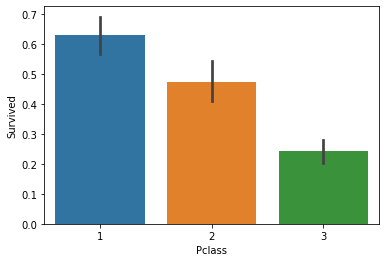

In [12]:
#Plot the survival rate of each class
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.show()

# As I have observed earlier 1st class have the highest chances of survival which is around 60% and 3rd class of the passengers have the lowest chances of approval around 25%.

In [13]:
#Look at survival rate by sex, age and class.
age = pd.cut(df['Age'], [0,18,80])
df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

# Observations of the above pivot table.

* Adult female aged between 18 to 80 of the first class have the highest survival rate of 97.29%.
* Male passenger of second class aged between 18 to 80 has the lowest survival rate of 07%.

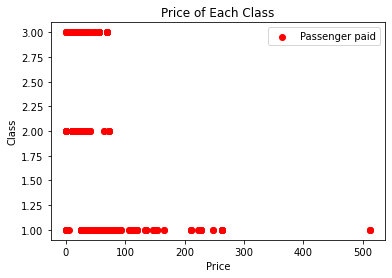

In [14]:
#Plot the prices paid of each class.
plt.scatter(df['Fare'], df['Pclass'], color = 'red', label = 'Passenger paid')
plt.ylabel('Class')
plt.xlabel('Price')
plt.title('Price of Each Class')
plt.legend()
plt.show()

# Here each dot is a passenger and x axis is the fare and y axis is the class. The highest fare was paid by a first class passenger which is around 500 british pounds. And the interesting point to note here is that from every class some passengers went on titanic for free as for ever class we have minimum fare as 0 british pounds. Also, passengers who paid more than 100 british pounds were in first class.

In [15]:
#Checking null values for entire dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 177 null values are present in Age column.
* 687 null values are present in Cabin which is a lot of missing values around 77% of the dataset hence I am going to remove this column.
* 2 null values are present for Embarked column. 

In [16]:
#Droping Cabin 
df = df.drop(columns = 'Cabin')

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# We have null values present in Age and Embarked columns as well. However here I am not going fillup the null values with diffrent numbers as I have observed people were given prefernce as per their classes, Age and Gender therefore incorrect numbers can lead to wrong prediction. Hence I will be removing those null values from the dataset.

In [18]:
#Remove the rows with missing values.
df = df.dropna(subset = ['Embarked','Age'])

In [19]:
#Checking if null values have been removed.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
#No null values are present.Now I will be removing Passenger ID and Name as they do not contribute to the target variable.
df = df.drop(columns = ['PassengerId', 'Name'])

In [21]:
#I will be removing ticket column as well because it is a ovject datatype which contains sting+numerical values and ML model can't read them.
df = df.drop(columns = 'Ticket')

In [22]:
#Count the new number of rows and columns in the dataset.
df.shape

(712, 8)

In [23]:
#Checking data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Next we have 2 object columns left so I am going to change their data in values for that I will be using Label Encoder()

In [24]:
#checking unique values for Sex and Embarked column.
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [25]:
#import Lable encoder
from sklearn.preprocessing import LabelEncoder

#Assigning label encoder to a variable
lab_enc = LabelEncoder()

In [26]:
#Encode the Sex column
df['Sex'] = lab_enc.fit_transform(df['Sex'])
df['Embarked'] = lab_enc.fit_transform(df['Embarked'])

In [27]:
#Checking if the columns have been transformed
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [28]:
#checking unique values for Sex and Embarked column after transformation
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


# From the above table I can see that after encoding sex column 1 is refering to male and 0 is for female. And after the transformation of Embarked column 0 refering to 'C', 1 is for 'Q' and 2 is for 'S' embarkation.

In [29]:
#Checking datatype
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

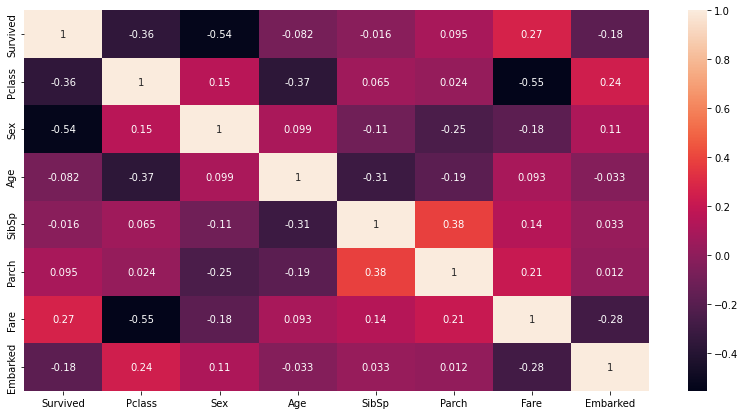

In [30]:
#Next I am going to plot a heatmap to observe the relationship between features.
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Sex and Pclass have strong negative relationship with target feature. Also, I can see Survived column has good relationship with Fare. Next I am going to check the distribution of columns.

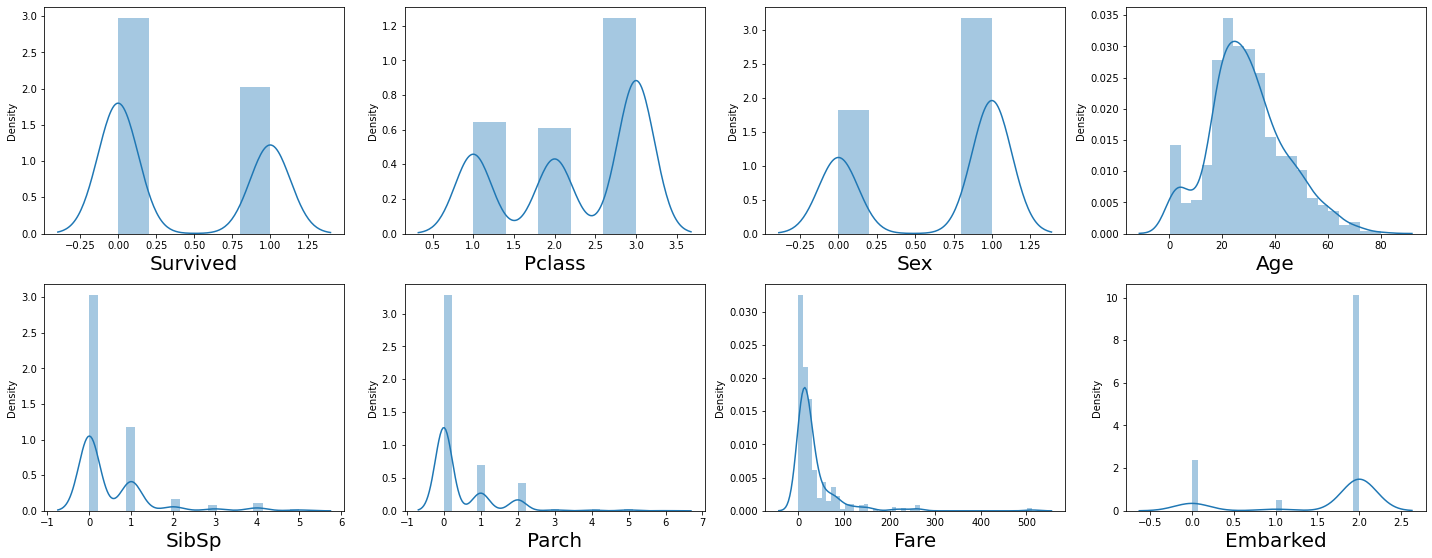

In [31]:
#Checking how data is distributed for every column.
plt.figure(figsize = (20,15))

plotnumber = 1

for column in df:
    if plotnumber <= 8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

# Observation
* Non-survival count is higher than survival count.
* 3rd class passenger count is more followed by 1st and 2nd class.
* Male passengers count is more than Female passenger count.
* As observed before passengers from 4 months to 80 years old were present on the titanic.
* Minimum number of sibling/spouse count is 0 and maximum is 5.
* Parent/children minimum count is 0 and maximum is 6.
* Fare started from 0 and went till 500 british pounds this is where we see some skewness present as one the passenger paid 500 british pound as their ticket fare as observed earlier.
* Same oversation as class, passengers from '2' embarkation count is more than rest 2 embarkations.

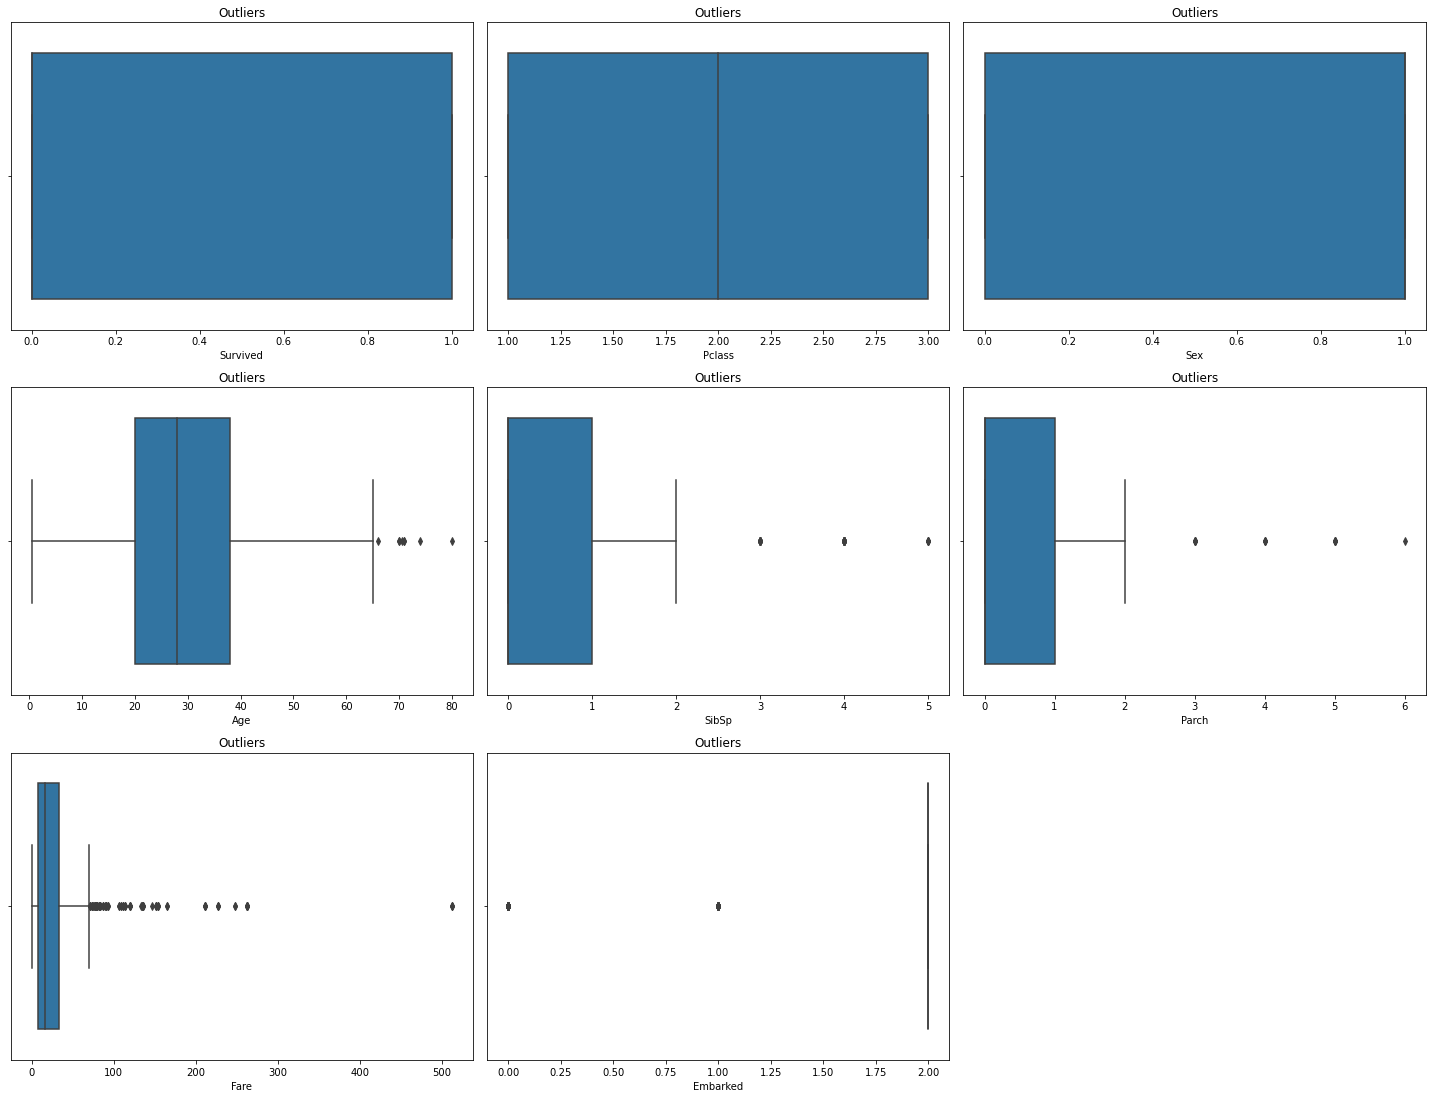

In [32]:
#Will implement boxplot to check outliers
plt.figure(figsize = (20,20))
plotnumber = 1

for column in df:
    if plotnumber <= 11:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plt.title('Outliers')
    
    plotnumber += 1
    
plt.tight_layout() 

# Here I am seeing some outliers present in the dataset however I am not going to remove them as they are not really outliers. Seeing these outliers because passenger's survival was dependent on their Class, Age, Gender I have seen adult female passengers from first class got high prefernce at the time of evacuation where as male passenger from 3rd class died more.

In [33]:
#Spliting data into x and y variable.
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [35]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Next I will scale the x data

In [36]:
#Scaling dataset.
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.90859974,  0.75613751, -0.52766856, ..., -0.50678737,
        -0.51637992,  0.51958818],
       [-1.48298257, -1.32251077,  0.57709388, ..., -0.50678737,
         0.69404605, -2.04948671],
       [ 0.90859974, -1.32251077, -0.25147795, ..., -0.50678737,
        -0.50362035,  0.51958818],
       ...,
       [-1.48298257, -1.32251077, -0.73481151, ..., -0.50678737,
        -0.08633507,  0.51958818],
       [-1.48298257,  0.75613751, -0.25147795, ..., -0.50678737,
        -0.08633507, -2.04948671],
       [ 0.90859974,  0.75613751,  0.16280796, ..., -0.50678737,
        -0.50692839, -0.76494927]])

# Split dataset into train and test data

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

# Defining a function to train and check training scores for some Classification models

In [50]:
#Defining function
def models(x_train,y_train):
    
    #Use logistic regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state = 0)
    lr.fit(x_train, y_train)
    
    
    #Use KNeighbors Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(x_train, y_train)
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    sl = SVC(kernel = 'linear', random_state = 0)
    sl.fit(x_train, y_train)
    
    #Use SVC (RBF kernel)
    s_rbf = SVC(kernel = 'rbf', random_state = 0)
    s_rbf.fit(x_train, y_train)
    
    #Use Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dt.fit(x_train, y_train)
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    rf.fit(x_train, y_train)
    
    #Print training accuracy score for each column
    print('Logistic Regression Training Accuracy: ', lr.score(x_train, y_train))
    print('KNeighbors Classifier Training Accuracy: ', knn.score(x_train, y_train))
    print('SVC Linear Kernel Training Accuracy: ', sl.score(x_train, y_train))
    print('SVC RBF kernel Training Accuracy: ', s_rbf.score(x_train, y_train))
    print('Decision Tree Classifier Training Accuracy: ', dt.score(x_train, y_train))
    print('Random Forest Classifier Training Accuracy: ', rf.score(x_train, y_train))
    
    return lr, knn, sl, s_rbf, dt, rf

In [51]:
#Get and train all the models
model = models(x_train, y_train)

Logistic Regression Training Accuracy:  0.8084358523725835
KNeighbors Classifier Training Accuracy:  0.8699472759226714
SVC Linear Kernel Training Accuracy:  0.7873462214411248
SVC RBF kernel Training Accuracy:  0.843585237258348
Decision Tree Classifier Training Accuracy:  0.9876977152899824
Random Forest Classifier Training Accuracy:  0.9701230228471002


# Getting Confusion matrix and test accuracy for each models

In [52]:
#Show confusion matrix and accuracy score for all the models on the test data
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    #Extract the TN, FP, FN, TP values
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()

    #Calculate test accuracy score
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[73  7]
 [22 41]]
Model[0] Testing Accuracy = "0.7972027972027972"

[[70 10]
 [23 40]]
Model[1] Testing Accuracy = "0.7692307692307693"

[[68 12]
 [24 39]]
Model[2] Testing Accuracy = "0.7482517482517482"

[[73  7]
 [18 45]]
Model[3] Testing Accuracy = "0.8251748251748252"

[[64 16]
 [24 39]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[70 10]
 [24 39]]
Model[5] Testing Accuracy = "0.7622377622377622"



# Checking Cross Validation score for each models

In [53]:
#Import Cross Validation Score
from sklearn.model_selection import cross_val_score 

#Use logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)

#Use KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

#Use SVC (linear kernel)
from sklearn.svm import SVC
sl = SVC(kernel = 'linear', random_state = 0)

#Use SVC (RBF kernel)
s_rbf = SVC(kernel = 'rbf', random_state = 0)

#Use Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)


#Print validation score for each column
print("Validation score for Logistic Regression: ", cross_val_score(lr, x, y, cv = 10, scoring = 'accuracy').mean())
print("Validation score for KNeighbors Classifier: ", cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy').mean())
print("Validation score for SVC Liner Kernel: ", cross_val_score(sl, x, y, cv = 10, scoring = 'accuracy').mean())
print("Validation score for SVC RBF Kernel: ", cross_val_score(s_rbf, x, y, cv = 10, scoring = 'accuracy').mean())
print("Validation score for Decision Tree Classifier: ", cross_val_score(dt, x, y, cv = 10, scoring = 'accuracy').mean())
print("Validation score for Random Forest Classifier: ", cross_val_score(rf, x, y, cv = 10, scoring = 'accuracy').mean())

Validation score for Logistic Regression:  0.7950312989045384
Validation score for KNeighbors Classifier:  0.7066118935837246
Validation score for SVC Liner Kernel:  0.7794796557120501
Validation score for SVC RBF Kernel:  0.6660993740219092
Validation score for Decision Tree Classifier:  0.7699139280125196
Validation score for Random Forest Classifier:  0.7994131455399061


# Here I am seeing Logistic Regression would be the best model to predict answer as Logistic regression's Training, Testing and Cross validation score differences are minimum.

# Feature selection for the best model

In [60]:
cols = ['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']

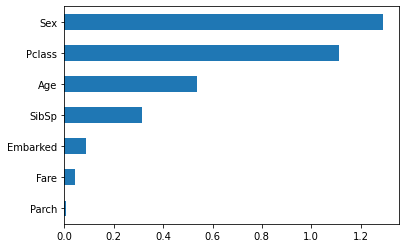

In [61]:
#Checking Feature coefficient
lr.fit(x_train, y_train)
coef = lr.coef_
feature_coef = pd.Series(coef[0], index = cols)
sort_feature_coef = feature_coef.abs().sort_values()
sort_feature_coef.plot.barh()
plt.show()

In [66]:
#Fitting Logistic Regression with selected features which has high coefficient with the model
x = df[['Sex', 'Pclass', 'Age', 'SibSp', 'Embarked']]
y = df['Survived']

#Scaling data
x = sc.fit_transform(x)

#Spliting dataset x and y dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

#Fitting model
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [67]:
#Model confidence/Accuracy without hyper parameter tuning
def metric_score(lr,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = lr.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = lr.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [70]:
#Call the function
metric_score(lr,x_train,x_test,y_train,y_test, train = True)

metric_score(lr,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 78.03%

====================================Test Result================================
Accurancy Score: 83.22%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        93
           1       0.76      0.76      0.76        50

    accuracy                           0.83       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.83      0.83      0.83       143



# Hyper papameter tuning on Logistic Regression

In [73]:
#Let's now try to tune some hyperparameters using the GridSearchCV algorithm. This time I will give little higher range

param_grid_lr = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2000, 5000]
    }
]

grid = GridSearchCV(estimator = lr,
                           param_grid = param_grid_lr,
                           cv = 5,
                           verbose = True,
                           n_jobs = -1)

grid_lr = grid.fit(x_train,y_train)

print('Best Parameters ==>', grid.best_params_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best Parameters ==> {'C': 0.004832930238571752, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [74]:
lr = grid.best_estimator_
lr.fit(x_train,y_train)

LogisticRegression(C=0.004832930238571752, random_state=0)

In [75]:
#Call the function
metric_score(lr,x_train,x_test,y_train,y_test, train = True)

metric_score(lr,x_train,x_test,y_train,y_test, train = False)


===================================Train Result=================================
Accurancy Score: 79.44%

====================================Test Result================================
Accurancy Score: 83.92%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89        93
           1       0.89      0.62      0.73        50

    accuracy                           0.84       143
   macro avg       0.85      0.79      0.81       143
weighted avg       0.85      0.84      0.83       143



# Next will check ROC AUC curve for the fitted model

In [76]:
#Import ROC_AUC curve
from sklearn.metrics import plot_roc_curve

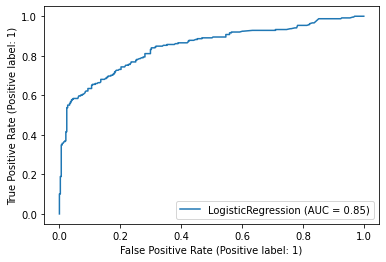

In [77]:
#Let's see how well our model works on training data.
plot_roc_curve(lr,x_train,y_train)
plt.show()

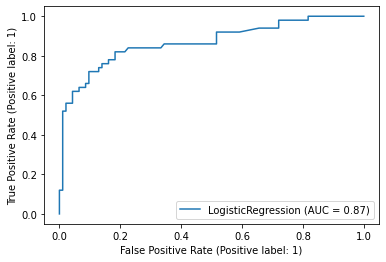

In [78]:
#Let's see how well our model works on training data.
plot_roc_curve(lr,x_test,y_test)
plt.show()

# Model looks good next I will be save the model and use it for prediction

In [79]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(lr, open('lr_model', 'wb'))

In [80]:
#Prediction using the saved model
loaded_model = pickle.load(open('lr_model','rb'))

In [82]:
#Loading model
a = loaded_model.predict(x_test)
a

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [84]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Survived': y_test, 'Predicted Survived': a})
DF

,Actual Survived,Predicted Survived
525,0,0
115,0,0
811,0,0
51,0,0
539,1,1
...,...,...
448,1,1
191,0,0
681,1,0
806,0,0


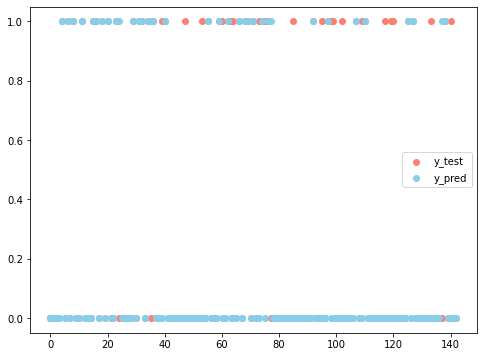

In [100]:
# Visualize Actual vs Predicted survival
fig = plt.figure(figsize=(8,6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label ="y_test")
plt.scatter(range(y_test.shape[0]), a, color="skyblue", label = "y_pred")
plt.legend();